# Principal Component Analysis with Cancer Data

In [216]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [217]:
df=pd.read_csv("breast-cancer-wisconsin-data.csv")
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [218]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [219]:
data = df.drop(['ID'],axis=1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [220]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
(699, 10)


In [221]:
data.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [222]:
# We could see "?" values in column, this should be removed from data set
data=data.replace('?','0')
# Check for missing value in any other column
data.isna().sample(12)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
649,False,False,False,False,False,False,False,False,False,False
32,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False
472,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False
335,False,False,False,False,False,False,False,False,False,False
590,False,False,False,False,False,False,False,False,False,False
271,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False


In [223]:
# No missing values found. So let us try to remove ? from bare nuclei column

data.replace('?',0).head()
# Get count of rows having ?
len(data.index) 

699

In [224]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

data = data.apply(pd.to_numeric, errors='coerce')
data=data.mask(data==0).fillna(data.mean())
data['Bare Nuclei'] = data['Bare Nuclei'].astype(int)
data['Bare Nuclei'] = data['Bare Nuclei'].replace(1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


In [225]:
data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,4,3,1,1,2


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [226]:
# Check for correlation of variable
data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.115886,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.155128,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.191644,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.201671,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.146768,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.115886,0.155128,0.191644,0.201671,0.146768,1.000000,0.155047,0.108628,0.081056,0.214617
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.155047,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.108628,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.081056,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.214617,0.756616,0.712244,0.423170,1.000000


In [227]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

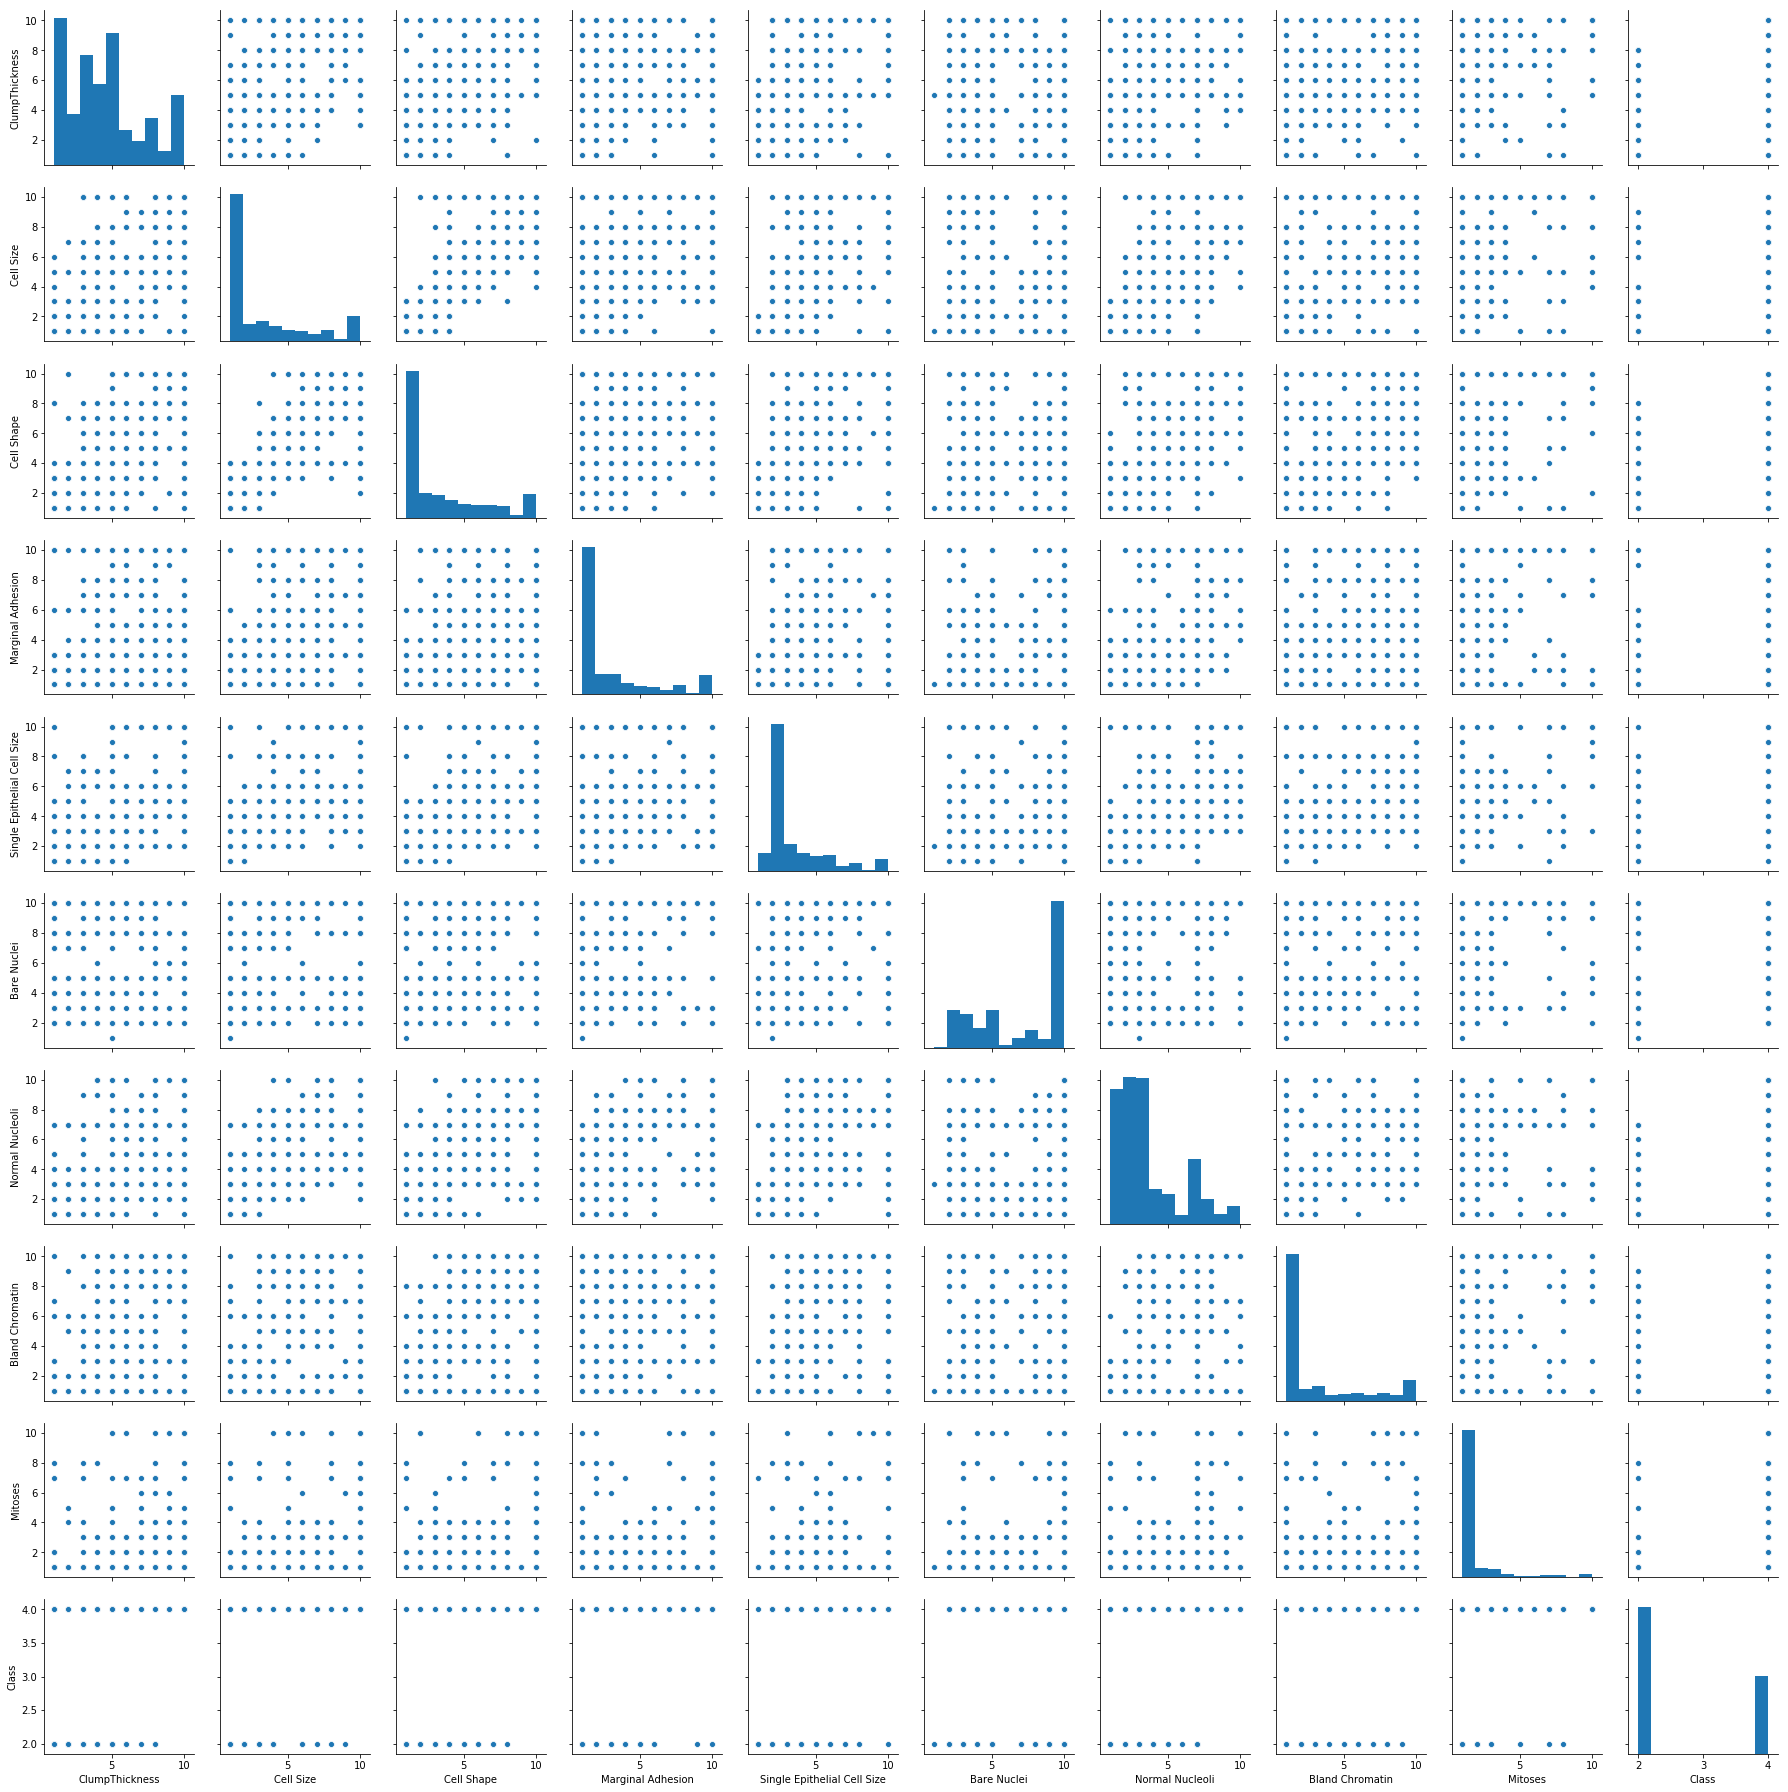

In [228]:
#Let us check for pair plots
sns.pairplot(data)

In [229]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [230]:
# We could see most of the outliers are now removed.
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
lower,upper = q1 - 1.5 * iqr,q3 + 1.5 * iqr
data = data[~((data < lower) | (data > upper)).any(axis=1)]
data.shape


(504, 10)

In [231]:
from scipy.stats import zscore
data.head()


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,4,3,1,1,2


In [232]:
numeric_cols=data.drop('Class', axis=1)


In [233]:

numeric_cols = numeric_cols.apply(zscore)
numeric_cols.head()
numeric_cols.drop(['Mitoses'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


# Q6 Create a covariance matrix for identifying Principal components

In [234]:
# PCA
# Step 1 - Create covariance matrix
numeric_cols.cov()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
ClumpThickness,1.001988,0.553403,0.563378,0.420841,0.392602,0.061947,0.430264,0.414383
Cell Size,0.553403,1.001988,0.903410,0.660457,0.653032,0.123008,0.626496,0.669513
Cell Shape,0.563378,0.903410,1.001988,0.631998,0.626996,0.151220,0.629872,0.635050
Marginal Adhesion,0.420841,0.660457,0.631998,1.001988,0.528145,0.099037,0.484625,0.521862
Single Epithelial Cell Size,0.392602,0.653032,0.626996,0.528145,1.001988,0.086379,0.474718,0.513782
Bare Nuclei,0.061947,0.123008,0.151220,0.099037,0.086379,1.001988,0.087115,0.078077
Normal Nucleoli,0.430264,0.626496,0.629872,0.484625,0.474718,0.087115,1.001988,0.525093
Bland Chromatin,0.414383,0.669513,0.635050,0.521862,0.513782,0.078077,0.525093,1.001988


In [235]:
X=numeric_cols
y=data[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Q7 Identify eigen values and eigen vector

In [236]:
# Step 2- Geteigen values and eigen vector
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(504, 7)

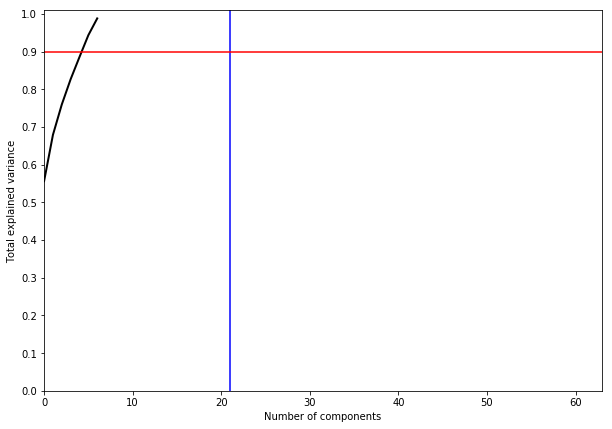

In [237]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [238]:
#captured 7 components approximately 100 % data
#Eigen_Vector and Eigen_Values.
eigenValues,eigenVector = np.linalg.eig(X.cov())
print("Eigen_Values {0}".format(eigenValues))
print("Eigen_Vector {0}".format(eigenVector))

Eigen_Values [4.45813015 0.9854767  0.09551732 0.64590644 0.35602152 0.5381545
 0.46368891 0.47300903]
Eigen_Vector [[ 0.31435009  0.07391213 -0.0144764   0.88974164  0.23993458  0.19180325
   0.08632341 -0.04541416]
 [ 0.43753476  0.01591052 -0.73395262 -0.03995555 -0.51505922  0.03384158
   0.03983319  0.00305829]
 [ 0.43164052 -0.01858718  0.67508205  0.01862815 -0.59706347  0.00350172
   0.0025857  -0.02746759]
 [ 0.36237234  0.01658377  0.03619714 -0.20442169  0.26646052  0.37071158
  -0.44431323  0.64766525]
 [ 0.35692221  0.03535783  0.02954698 -0.34215185  0.3136686   0.4338019
   0.00636811 -0.68322969]
 [ 0.07657671 -0.99369101 -0.0214923   0.03699423  0.06354155 -0.00901908
   0.02670654 -0.00718198]
 [ 0.35434922  0.03868211 -0.01640974  0.00442588  0.23871804 -0.74984225
  -0.46750003 -0.18666942]
 [ 0.36510174  0.05911888  0.04953537 -0.21487691  0.30041235 -0.27220964
   0.75778004  0.27568749]]


# Q8 Find variance and cumulative variance by each eigen vector

In [239]:
totVariance=eigenValues.sum()
totVariance


8.015904572564619

In [240]:
cumulative_var=[(i/totVariance)*100 for i in eigenValues]
cumulative_var

[55.61605819341066,
 12.294017353386243,
 1.1915975011783435,
 8.05781103110799,
 4.441439120942327,
 6.71358421013034,
 5.784611131896735,
 5.90088145794737]

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [241]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [242]:
X_pca = pca.transform(X)
X_pca.shape


(504, 7)

# Q10 Find correlation between components and features

In [243]:
fea=pca.n_features_
comp = pca.n_components_
print(fea)
print(comp)

8
7


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

In [258]:
rating=pd.read_csv("jokes.csv")
rating.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [259]:
rating = rating.head(200)
rating.shape
rating.drop('NumJokes',axis=1,inplace=True)

# Q22 Change the column indices from 0 to 99

In [260]:
#for colName in np.arange(0,99): 
rating.columns =np.arange(0,100)
rating.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [268]:
rating.replace(99.00,0,inplace=True)


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [269]:
scaler = StandardScaler()
rating_diff = scaler.fit_transform(rating)
rating_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

In [270]:
df=pd.DataFrame(rating_diff)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [271]:
df = df.mean()

In [272]:
df.sort_values(ascending=False)[:10]

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64